In [4]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install matplotlib
!pip install pandas
!pip install sklearn
!pip install seaborn
!pip install math

ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


In [5]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import seaborn as sns
import math
import os
from sklearn.metrics import mean_squared_error
# from keras.optimizers import SGD


In [6]:
df = pd.read_csv(r"C:\Users\Manshi Mishra\Downloads\FeaturesNoIndex.csv")

<AxesSubplot:>

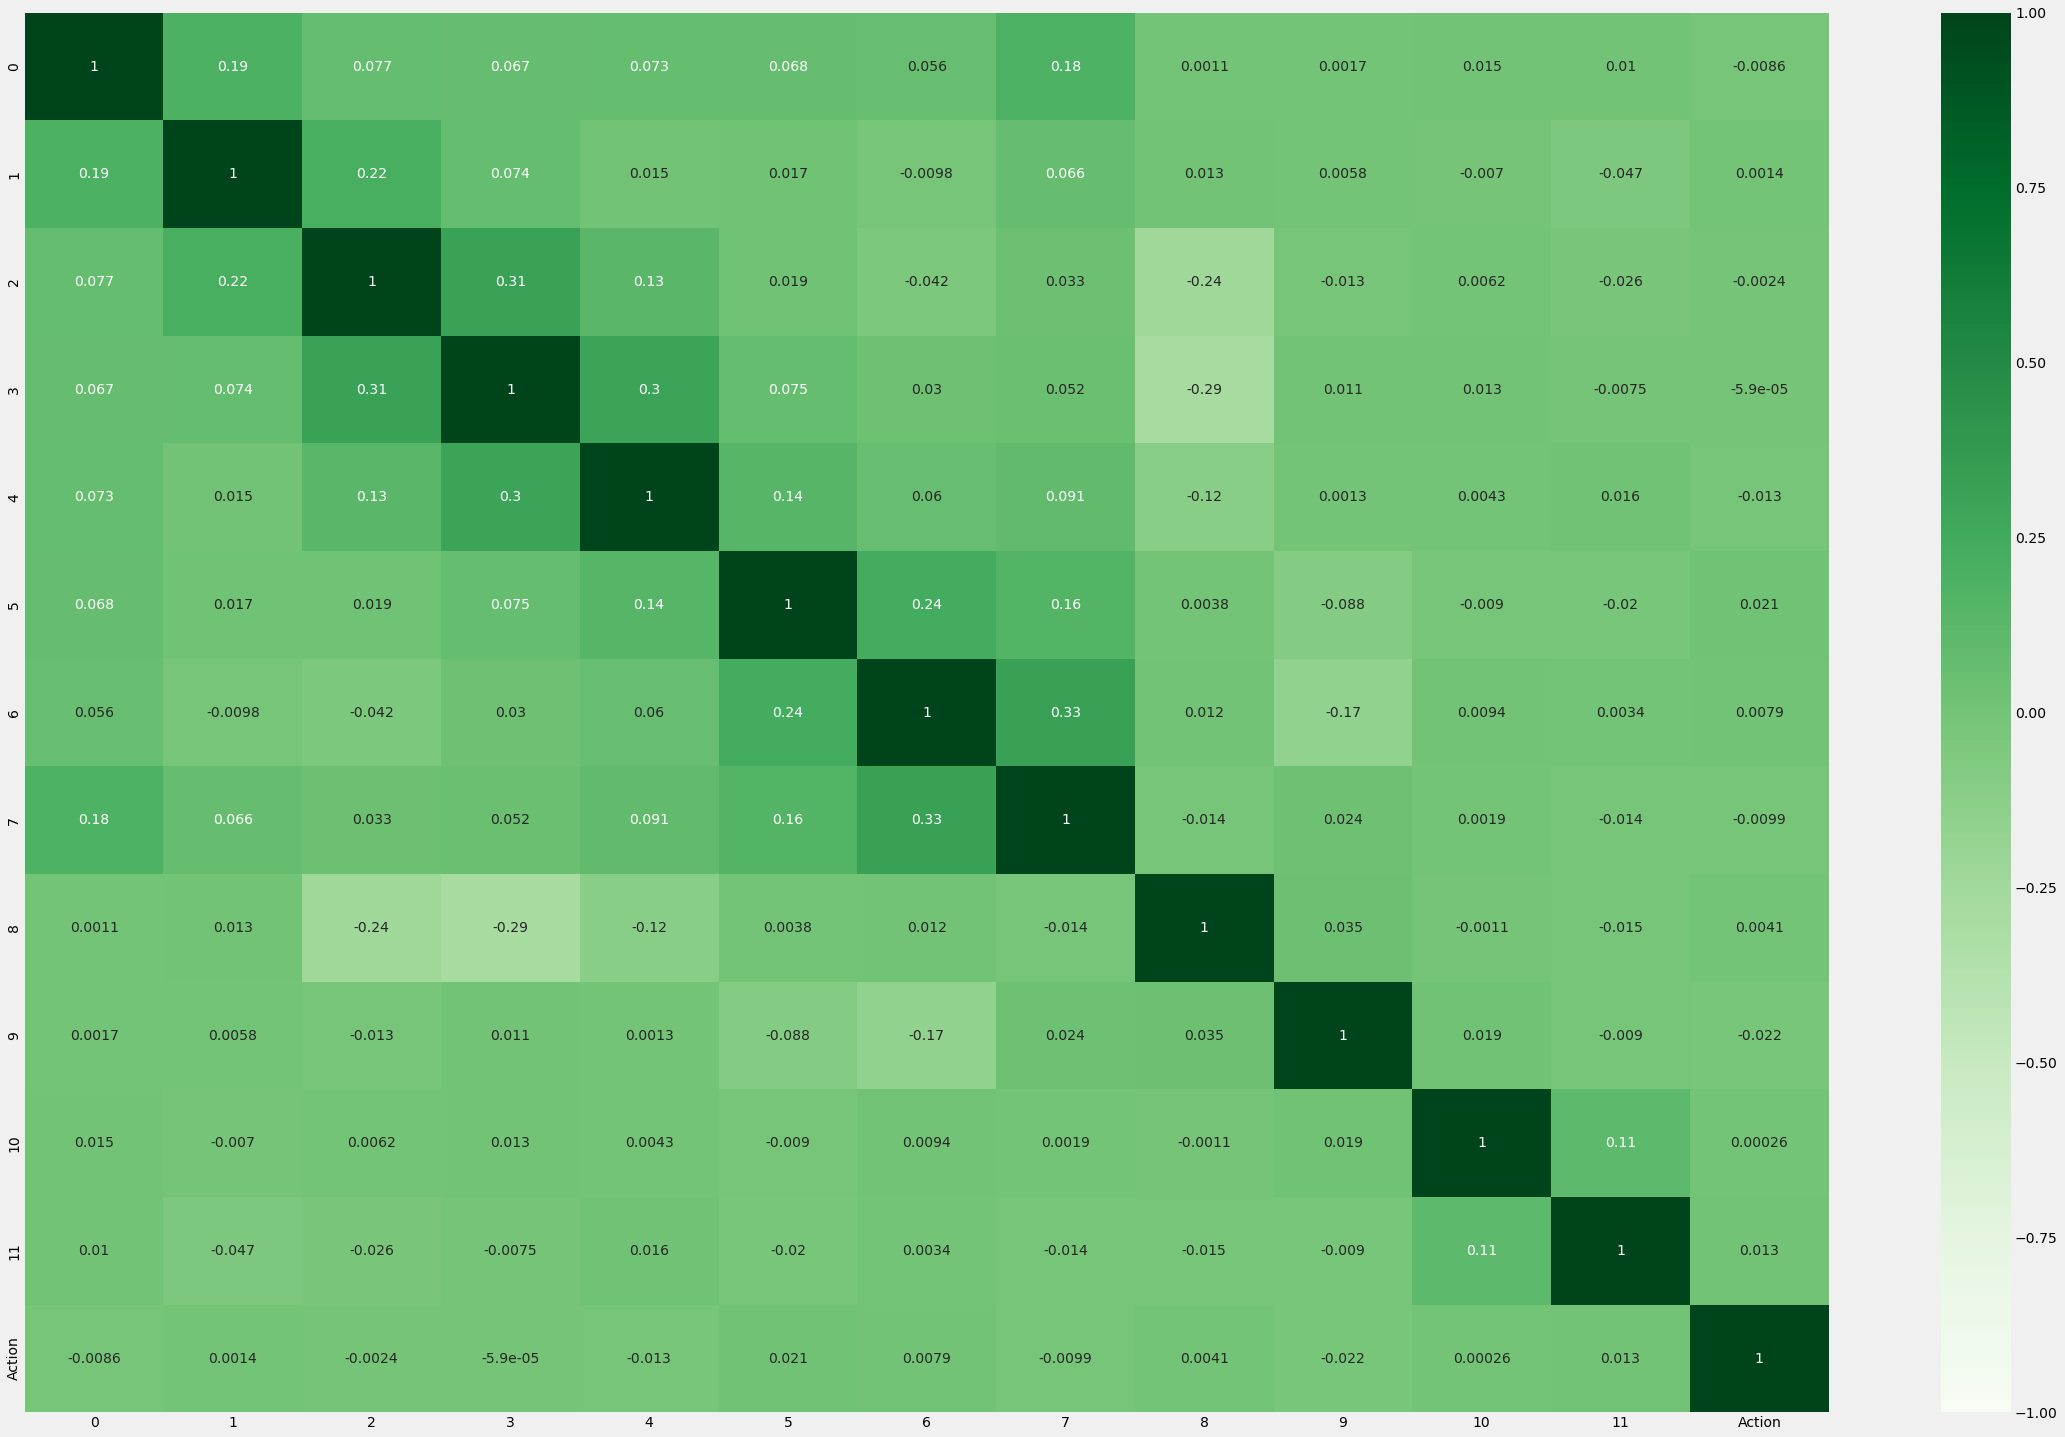

In [7]:
corr = df.corr()
plt.figure(figsize=(36,24))
heat = sns.heatmap(corr, vmin = -1,vmax = 1,cmap="Greens",annot=True) #You can change the cmap to "RdYlGn" for another color combo
heat

In [10]:
import keras

#to give labels to the different exercises
from tensorflow.keras.utils import to_categorical

import keras
from tensorflow.keras.utils import to_categorical

#deleting action line-because action supposed to be output
X = df.drop(['Action'],axis=1)
print(X.shape)

#actions stored in y-axis
y = df.Action

#3 exercises, classes = 3
Y = to_categorical(y, num_classes = 3)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#random state to shuffle data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 25)

#to test input shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
# standardscaler to restrict the range of variance of the data range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#structure of input and output from sequential
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 128, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12))
classifier.add(Dropout(rate = 0.4))

# Adding the second hidden layer
classifier.add(Dense(units = 256, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.3))

#drop certain amount of output, here 0.2, Shall benefit in overfitting
classifier.add(Dense(units = 140, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.2))

classifier.add(Dense(units = 106, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.3))

classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.4))

classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.3))

classifier.add(Dense(units = 16, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.2))

# Adding the output layer
# units 3 shall provide 3 ouput
classifier.add(Dense(units = 3, kernel_initializer = 'he_uniform', activation = 'softmax'))

# Compiling the ANN | means applying SGD on the whole ANN
#adam used as gradient descent, loss function used is categorical crossentropy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
# each epoch has batch size 32
hist = classifier.fit(X_train, y_train, batch_size = 32, epochs = 2000,verbose = 0,validation_data=(X_test, y_test))

#score is loss
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=20)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
testLoss, TestAcc = classifier.evaluate(X_test, y_test,
                            batch_size=20)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

(9000, 12)
(8100, 12)
(900, 12)
(8100, 3)
(900, 3)
405/405 [==============================] - 1s 2ms/step - loss: 0.2141 - accuracy: 0.9494
Train score: 0.21409010887145996
Train accuracy: 0.9493827223777771
********************
45/45 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.7622
Test score: 0.21409010887145996
Test accuracy: 0.9493827223777771


In [15]:
#save in tf and h5 format

classifier.save("Prosthetic_Model_Final_TF",save_format = 'tf')
classifier.save("Prosthetic_Model__Final_H5",save_format = 'h5')
classifier.save("P1_model.h5")

INFO:tensorflow:Assets written to: Prosthetic_Model_Final_TF\assets


In [16]:
#coverting to tflite model

model = tf.keras.models.load_model('P1_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("Prosthetic_Model__Final_H5_TFLite.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\MANSHI~1\AppData\Local\Temp\tmp5yblbsqh\assets


384228

In [17]:
#load modeland test

new_model = tf.keras.models.load_model('Prosthetic_Model__Final_H5')
preds = new_model.predict(X_train)
preds = preds > 0.6
score, acc = new_model.evaluate(X_train, y_train,
                            batch_size=20)
print('Train score:', score)
print('Train accuracy:', acc)

# Making predictions and evaluation
y_preds = new_model.predict(X_test)
y_preds = y_preds > 0.6
print('*'*20)
testLoss, TestAcc = new_model.evaluate(X_test, y_test,
                            batch_size=20)
print('Test score:', score)
print('Test accuracy:', acc)

405/405 [==============================] - 1s 1ms/step - loss: 0.2141 - accuracy: 0.9494
Train score: 0.21409010887145996
Train accuracy: 0.9493827223777771
********************
45/45 [==============================] - 0s 1ms/step - loss: 0.6121 - accuracy: 0.7622
Test score: 0.21409010887145996
Test accuracy: 0.9493827223777771


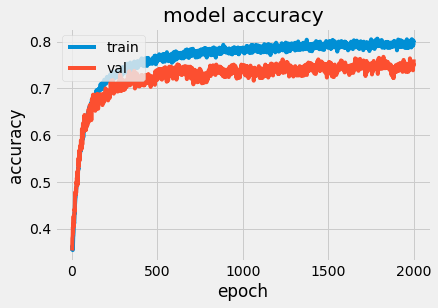

In [18]:
plt.figure(1)
# accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

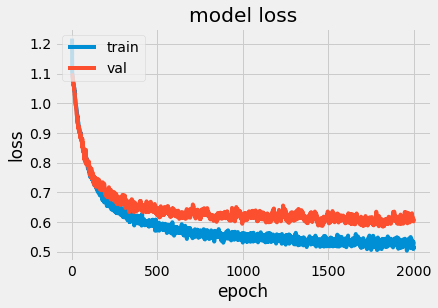

In [19]:
plt.figure(1)
# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis = 1), y_preds.argmax(axis=1))

In [21]:
cm

array([[287,  26,   8],
       [111, 198,   7],
       [ 70,  31, 162]], dtype=int64)

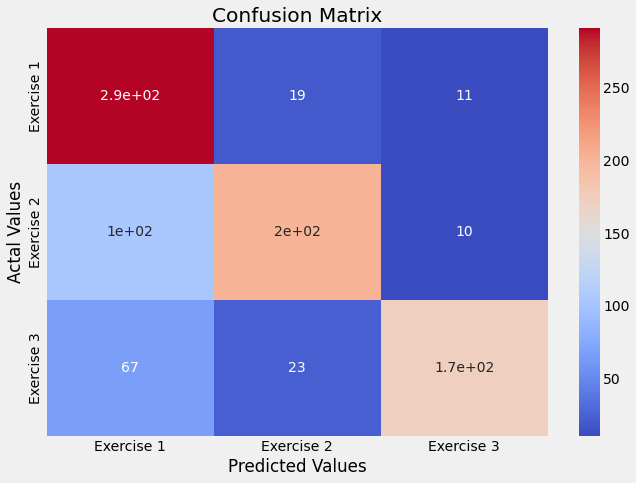

In [35]:
cm_df = pd.DataFrame(cm,
                     index = ['Exercise 1','Exercise 2','Exercise 3'], 
                     columns = ['Exercise 1','Exercise 2','Exercise 3'])
#Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, cmap = 'coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

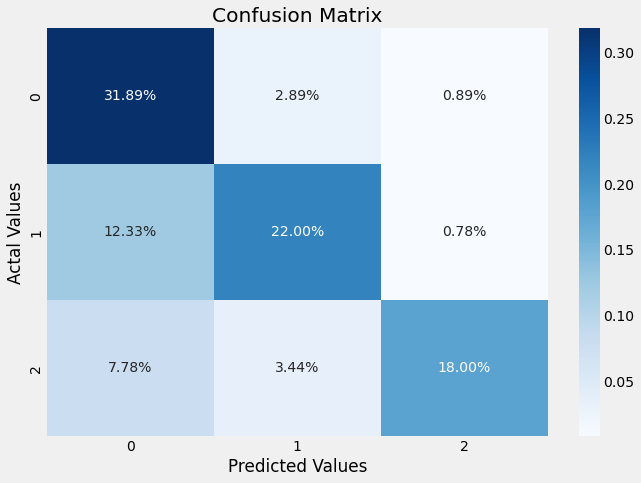

In [22]:
cm_df = pd.DataFrame(cm,
                     index = ['Exercise 1','Exercise 2','Exercise 3'], 
                     columns = ['Exercise 1','Exercise 2','Exercise 3'])
#Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm/np.sum(cm),fmt = ".2%", annot=True, cmap = 'Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()